# TNS99x8 dither black and white
_Gilbert Francois Duivesteijn_

In [2]:
import glob
import os
import pprint
from typing import List, Tuple

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import ProcessPoolExecutor

import time

from concurrent import futures
import multiprocessing


from lib.adjustment import Adjustment
from lib.msxcolor import MSXColor
import lib.color_transform as ct
from lib.dither import Dither

from lib.tms99x8_bw_dither import TMS99x8_BW_Dither


%matplotlib widget

In [3]:
image_folder = "../../resources/test_images"
image_paths = sorted(glob.glob(os.path.join(image_folder, "image*.png")))
image_paths

['../../resources/test_images/image01.png',
 '../../resources/test_images/image02.png',
 '../../resources/test_images/image03.png',
 '../../resources/test_images/image04.png',
 '../../resources/test_images/image05.png',
 '../../resources/test_images/image06.png',
 '../../resources/test_images/image07.png',
 '../../resources/test_images/image08.png',
 '../../resources/test_images/image09.png',
 '../../resources/test_images/image10.png',
 '../../resources/test_images/image11.png']

In [5]:
images = [cv.cvtColor(cv.imread(image_path), cv.COLOR_BGR2RGB) for image_path in image_paths]
images = [cv.resize(image, (256, 192), cv.INTER_LINEAR) for image in images]

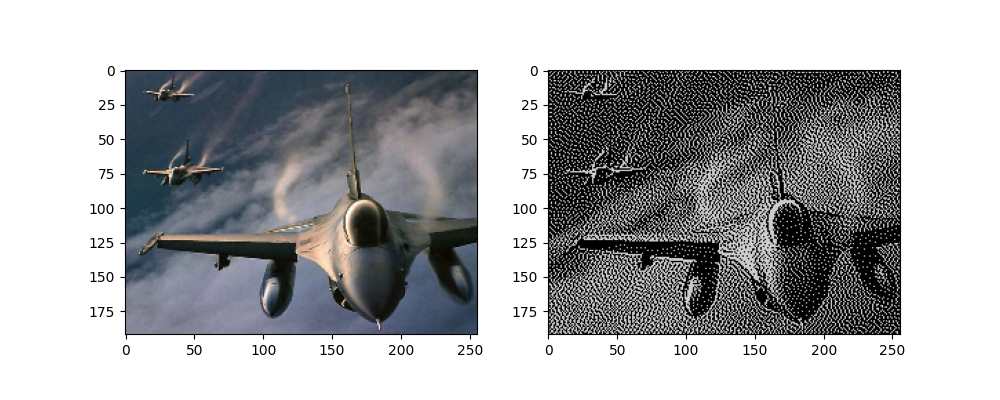

In [15]:
tms = TMS99x8_BW_Dither(background_color=14)

src = images[2]
dst = tms.render(src, brightness=0, contrast=50, dither=Dither.JARVIS_JUDICE_NINKE)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(src)
axs[1].imshow(dst)


In [11]:
def test(**kwargs):
    for k, v in kwargs.items():
        print(k, v)
    z = kwargs.get("contrast", 0)
    print(z)

In [6]:
params = {"k1": "v1", "k2": "v2"}


test(a=1, contrast=100)

a 1
contrast 100
100


In [7]:
a = np.random.rand(16, 3)
a[14,:]

array([0.63617243, 0.26588864, 0.41100499])

In [8]:
b = np.ones(shape=(4, 4, 3))
b*a[14,:]

array([[[0.63617243, 0.26588864, 0.41100499],
        [0.63617243, 0.26588864, 0.41100499],
        [0.63617243, 0.26588864, 0.41100499],
        [0.63617243, 0.26588864, 0.41100499]],

       [[0.63617243, 0.26588864, 0.41100499],
        [0.63617243, 0.26588864, 0.41100499],
        [0.63617243, 0.26588864, 0.41100499],
        [0.63617243, 0.26588864, 0.41100499]],

       [[0.63617243, 0.26588864, 0.41100499],
        [0.63617243, 0.26588864, 0.41100499],
        [0.63617243, 0.26588864, 0.41100499],
        [0.63617243, 0.26588864, 0.41100499]],

       [[0.63617243, 0.26588864, 0.41100499],
        [0.63617243, 0.26588864, 0.41100499],
        [0.63617243, 0.26588864, 0.41100499],
        [0.63617243, 0.26588864, 0.41100499]]])